In [ ]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Columnas disponibles: Index(['mes', 'apache_spark:_(todo_el_mundo)',
       'apache_hadoop:_(todo_el_mundo)', 'apache_hive:_(todo_el_mundo)',
       'apache_cassandra:_(todo_el_mundo)'],
      dtype='object')


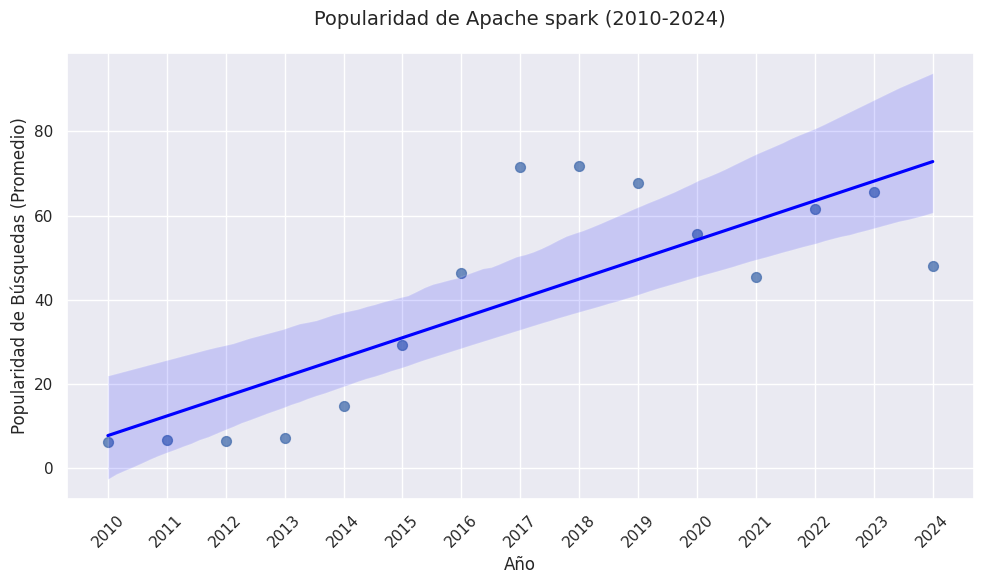

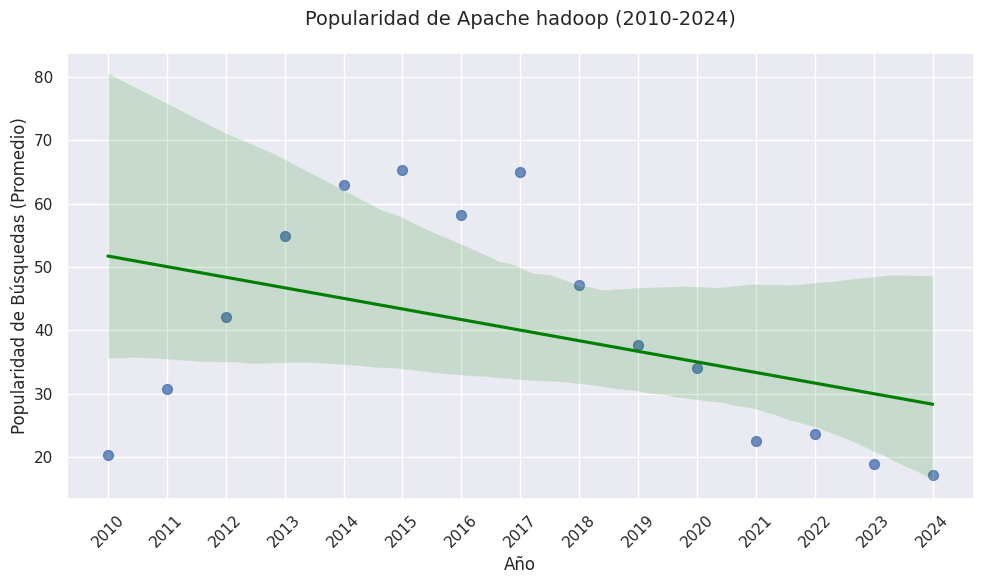

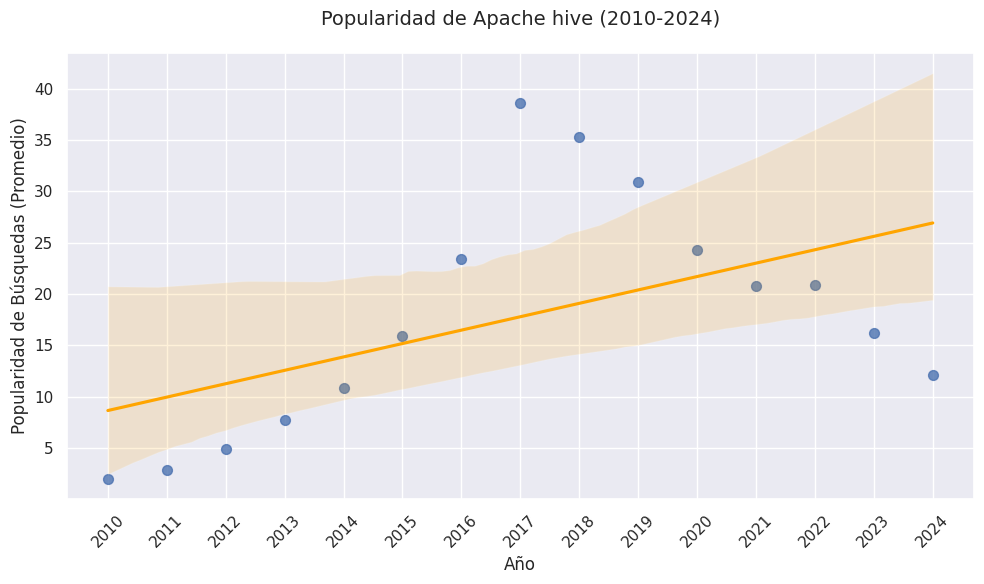

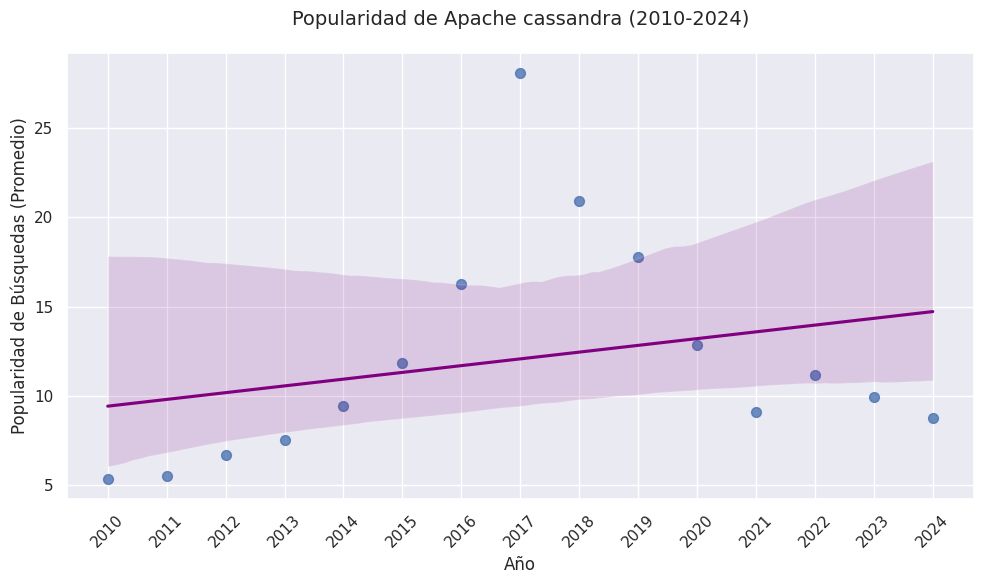


Matriz de correlación entre las tecnologías:
                                   apache_spark:_(todo_el_mundo)  \
apache_spark:_(todo_el_mundo)                           1.000000   
apache_hadoop:_(todo_el_mundo)                         -0.098062   
apache_hive:_(todo_el_mundo)                            0.887485   
apache_cassandra:_(todo_el_mundo)                       0.744493   

                                   apache_hadoop:_(todo_el_mundo)  \
apache_spark:_(todo_el_mundo)                           -0.098062   
apache_hadoop:_(todo_el_mundo)                           1.000000   
apache_hive:_(todo_el_mundo)                             0.282392   
apache_cassandra:_(todo_el_mundo)                        0.482338   

                                   apache_hive:_(todo_el_mundo)  \
apache_spark:_(todo_el_mundo)                          0.887485   
apache_hadoop:_(todo_el_mundo)                         0.282392   
apache_hive:_(todo_el_mundo)                           1.000000   

In [ ]:


# Configurar el estilo de Seaborn
sns.set_theme(style="darkgrid")

# Cargar el archivo Excel
data_excel = pd.read_excel('/content/graficos/multiTimeline-_4_.xlsx')

# Normalizar los nombres de las columnas
data_excel.columns = data_excel.columns.str.strip().str.lower().str.replace(' ', '_')

# Verificar los nombres de las columnas
print("Columnas disponibles:", data_excel.columns)

# Especificar las columnas relevantes según los datos disponibles
cols_to_convert = [
    'apache_spark:_(todo_el_mundo)',
    'apache_hadoop:_(todo_el_mundo)',
    'apache_hive:_(todo_el_mundo)',
    'apache_cassandra:_(todo_el_mundo)'
]

# Convertir las columnas de popularidad a tipo numérico
data_excel[cols_to_convert] = data_excel[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Convertir la columna 'mes' a tipo datetime
data_excel['mes'] = pd.to_datetime(data_excel['mes'])

# Extraer el año y agregarlo como una nueva columna
data_excel['año'] = data_excel['mes'].dt.year

# Agrupar los datos por año y calcular el promedio anual
data_excel_grouped = data_excel.groupby('año').mean().reset_index()

# Crear gráficos individuales para cada tecnología
tecnologias = {
    'apache_spark:_(todo_el_mundo)': 'blue',
    'apache_hadoop:_(todo_el_mundo)': 'green',
    'apache_hive:_(todo_el_mundo)': 'orange',
    'apache_cassandra:_(todo_el_mundo)': 'purple'
}

for tecnologia, color in tecnologias.items():
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=data_excel_grouped['año'],
        y=data_excel_grouped[tecnologia],
        scatter_kws={'s': 50},  # Tamaño de los puntos
        line_kws={'color': color},  # Color de la línea
    )

    # Configurar el gráfico individual
    plt.title(f'Popularidad de {tecnologia.split(":")[0].replace("_", " ").capitalize()} (2010-2024)', fontsize=14, pad=20)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=12)
    plt.xticks(data_excel_grouped['año'], rotation=45)
    plt.tight_layout()

    # Mostrar cada gráfico
    plt.show()

# Calcular y mostrar correlaciones entre tecnologías
correlation_matrix = data_excel_grouped[cols_to_convert].corr()
print("\nMatriz de correlación entre las tecnologías:")
print(correlation_matrix)
